In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, RepeatedKFold

import warnings

# Filter out import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [3]:
df = pd.read_csv('data/data.csv')
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew_Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [5]:
data = df.reindex(columns=['DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])
data

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,-1,124,636,324,323,448,48,34,38,29.86,9,17,14
1,-7,371,2475,340,333,531,48,34,38,29.86,9,17,15
2,40,181,1069,301,341,482,48,34,38,29.86,9,17,22
3,-2,168,944,345,343,513,48,34,38,29.86,9,17,12
4,-4,139,760,360,356,499,46,32,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,0,30.18,20,32,19
28816,2,75,187,1390,1392,25,39,38,0,30.18,19,23,22
28817,283,392,2422,1125,1408,1337,39,38,0,30.18,19,23,21
28818,5,224,1598,1417,1422,261,39,38,0,30.18,19,23,13


In [20]:
data_to_use = data.iloc[:,0:12]
data_to_use

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr
0,-1,124,636,324,323,448,48,34,38,29.86,9,17
1,-7,371,2475,340,333,531,48,34,38,29.86,9,17
2,40,181,1069,301,341,482,48,34,38,29.86,9,17
3,-2,168,944,345,343,513,48,34,38,29.86,9,17
4,-4,139,760,360,356,499,46,32,35,29.91,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,0,30.18,20,32
28816,2,75,187,1390,1392,25,39,38,0,30.18,19,23
28817,283,392,2422,1125,1408,1337,39,38,0,30.18,19,23
28818,5,224,1598,1417,1422,261,39,38,0,30.18,19,23


In [15]:
data_to_target = data.iloc[:,12]
data_to_target

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

In [ ]:
# Standardize selected columns
scaler = StandardScaler()
columns_to_standardize = ['Temperature', 'Wind Gust', 'Pressure', 'DISTANCE']
data_to_use[columns_to_standardize] = scaler.fit_transform(data_to_use[columns_to_standardize])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=20, random_state=32)


In [23]:
## linear regression model...Training
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = LR.predict(X_test)
y_pred

array([22.46635987, 22.78062398, 23.20724739, 25.33095827, 18.41998693,
       18.11694829, 23.64633916, 18.94990448, 18.1633704 , 22.40493819,
       23.57576039, 22.95645024, 20.79973252, 20.68353155, 20.11053144,
       21.2562442 , 22.49142617, 23.04157149, 20.53175464, 22.75535696])

In [26]:
result = {'Actual_taxi_out': y_test, 'Predicted_taxi_out': y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_taxi_out,Predicted_taxi_out
9362,23,22.466360
23840,14,22.780624
24617,22,23.207247
24899,19,25.330958
2007,20,18.419987
8034,16,18.116948
7222,21,23.646339
17910,16,18.949904
911,16,18.163370
10602,19,22.404938


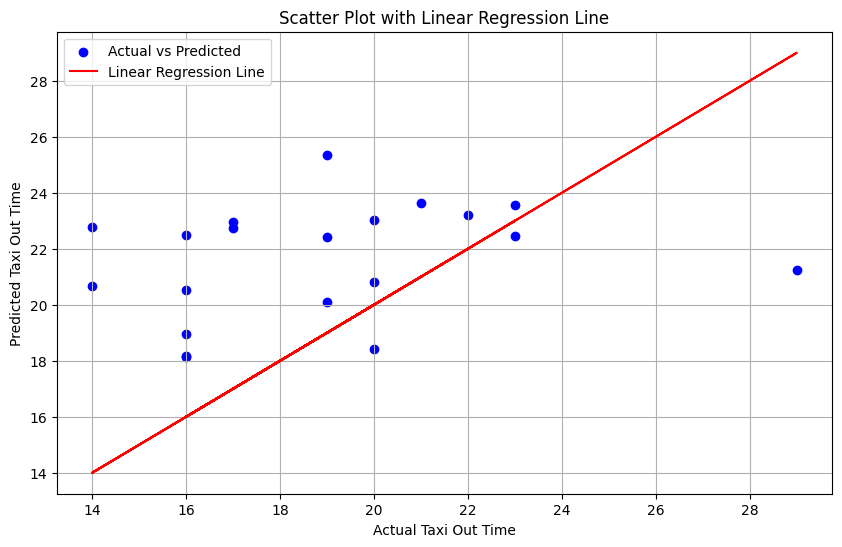

In [49]:
# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(result_df['Actual_taxi_out'], result_df['Predicted_taxi_out'], color='blue', label='Actual vs Predicted')

# Linear regression line
plt.plot(result_df['Actual_taxi_out'], result_df['Actual_taxi_out'], color='red', label='Linear Regression Line')

plt.xlabel('Actual Taxi Out Time')
plt.ylabel('Predicted Taxi Out Time')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.grid(True)

plt.show()


what metric would you recommend for linear regression accuracy evaluations

each blue repreent the actual vs predicted values
the linear regression line is the actual values 
this shows how well the linear regression model fits the data 
high variants as most of the predicted values are far away from the linear regression line during the test